In [1]:
import requests 
response = requests.get(url="https://store.steampowered.com/appreviews/570?json=1").json()

In [2]:
response['reviews'][0]['review']

'- Pick Tiny\n- Get mega creeps\n- Wait near enemy fountain with teammates\n- Toss teammates into fountain\n- Teammates died\n- Enemies team came back\n- Lost. Got reported.\n\n11/10 would do it again.'

In [3]:
import requests

def get_reviews(appid, params={'json':1}):
        appid = str(appid)
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [4]:
get_reviews(570).keys()

dict_keys(['success', 'query_summary', 'reviews', 'cursor'])

In [5]:
def get_n_reviews(appid, n=100):
    reviews = []
    cursor = '*'
    params = {
        'json':1,
        'filter':'all',
        'langauge':'english',
        'day_range': 9223372036854775807,
        'review_type': 'all',
        'purchase_type': 'all'
    }
    
    while n>0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100,n)
        if n>100: n = n - 100
        
        response = get_reviews(appid,params)
        cursor = response['cursor']
        reviews = reviews + response['reviews']
        
        if len(response['reviews']) < 100: break
    return reviews

In [6]:
get_n_reviews(570, 10)

[{'recommendationid': '103119288',
  'author': {'steamid': '76561198870849422',
   'num_games_owned': 85,
   'num_reviews': 29,
   'playtime_forever': 142,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 46,
   'last_played': 1638291340},
  'language': 'english',
  'review': 'This community is so nice i got a lot of tips on how to uninstall the game and kill myself',
  'timestamp_created': 1637398450,
  'timestamp_updated': 1637398450,
  'voted_up': True,
  'votes_up': 530,
  'votes_funny': 469,
  'weighted_vote_score': '0.954995155334472656',
  'comment_count': 10,
  'steam_purchase': False,
  'received_for_free': False,
  'written_during_early_access': False},
 {'recommendationid': '96600878',
  'author': {'steamid': '76561199172110556',
   'num_games_owned': 1,
   'num_reviews': 1,
   'playtime_forever': 155433,
   'playtime_last_two_weeks': 5798,
   'playtime_at_review': 44905,
   'last_played': 1646022310},
  'language': 'english',
  'review': "[h1]  This game ruined my 

In [7]:
from bs4 import BeautifulSoup

def get_app_id(game_name):
    response = requests.get(url=f'https://store.steampowered.com/search/?term={game_name}&category1=998',
                           headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')
    app_id = soup.find(class_='search_result_row')['data-ds-appid']
    return app_id

In [8]:
get_app_id('Dota 2')

'570'

## Start here

In [9]:
import pandas as pd
import requests

In [10]:
#Scrape data and create dataframe

### Get AppID by searching for the game

In [11]:
from bs4 import BeautifulSoup

#Function to get app_id from name
def get_app_id(game_name):
    response = requests.get(url=f'https://store.steampowered.com/search/?term={game_name}&category1=998',
                           headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')
    app_id = soup.find(class_='search_result_row')['data-ds-appid']
    return app_id

In [12]:
app_id = get_app_id('Dota 2')

In [13]:
app_id

'570'

In [14]:
type(app_id)

str

In [15]:
#Function to get reviews for specified app_id
def get_reviews(app_id, params={'json':1}):
    app_id = str(app_id)
    url = 'https://store.steampowered.com/appreviews/'
    response = requests.get(url=url+app_id, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    return response.json()

In [16]:
get_reviews(570).keys()

dict_keys(['success', 'query_summary', 'reviews', 'cursor'])

In [17]:
get_reviews(570)['reviews'][2]['review']

'This game remembered my birthday when everyone else forgot.\n'

In [18]:
def get_n_reviews(app_id, n=100):
    app_id = str(app_id)
    reviews = []
    cursor = '*'
    params = {
            'json' : 1,
            'filter' : 'all',
            'language' : 'english',
            'day_range' : 9223372036854775807,
            'review_type' : 'all',
            'purchase_type' : 'all'
            }

    while n > 0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(app_id, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [19]:
reviews = get_n_reviews(570, 5000)

In [20]:
reviews

[{'recommendationid': '103119288',
  'author': {'steamid': '76561198870849422',
   'num_games_owned': 85,
   'num_reviews': 29,
   'playtime_forever': 142,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 46,
   'last_played': 1638291340},
  'language': 'english',
  'review': 'This community is so nice i got a lot of tips on how to uninstall the game and kill myself',
  'timestamp_created': 1637398450,
  'timestamp_updated': 1637398450,
  'voted_up': True,
  'votes_up': 530,
  'votes_funny': 469,
  'weighted_vote_score': '0.954995155334472656',
  'comment_count': 10,
  'steam_purchase': False,
  'received_for_free': False,
  'written_during_early_access': False},
 {'recommendationid': '96600878',
  'author': {'steamid': '76561199172110556',
   'num_games_owned': 1,
   'num_reviews': 1,
   'playtime_forever': 155433,
   'playtime_last_two_weeks': 5798,
   'playtime_at_review': 44905,
   'last_played': 1646022310},
  'language': 'english',
  'review': "[h1]  This game ruined my 

In [21]:
reviews_df = pd.DataFrame(reviews)[['review', 'voted_up', 'weighted_vote_score']]

In [22]:
reviews_df.sort_values(by='weighted_vote_score', ascending=False)

,review,voted_up,weighted_vote_score
0,This community is so nice i got a lot of tips ...,True,0.954995155334472656
1,[h1] This game ruined my life [/h1] \nI recom...,False,0.949312806129455566
2,"[h1]""You learn how to learn, how to lose and ...",True,0.946791589260101318
3,This game taught me about the diversity of cul...,True,0.944492042064666748
4,Pros:\n- You will learn Russian\n- You will le...,True,0.94373929500579834
...,...,...,...
4984,Well.\n\nFuck.,True,0.56204378604888916
4983,this game is a large black hole \nit will suck...,True,0.56204378604888916
4982,"5head game, fun if u get non-pinoy teammates. ...",True,0.56204378604888916
4981,Never ever touch this game,True,0.56204378604888916


In [23]:
reviews_df['review'][2]

'[h1]"You learn how to learn,  how to lose and most importantly you learn about you."[/h1]\n\nAlright.... so here is my dota 2 review after playing almost 6000 hours over  the span of 3 years.\n\n1. general thoughts and how i started:\nI was  15 when a friend recommended dota 2 to me. Back then i wouldnt ever have imagined how much time this game would take from me. At some point i was playing 12+ hours a day for weeks. Now im approaching my 19th birthday and im kind of conflicted on what kind of impact  this game had on my life. I learned a lot about myself and generally speaking matured a lot regarding interacting with other humans. Dota isnt just a game, Dota is something else, something i have never experienced even when i was addicted to a mmorpg when i was 9-13. You learn how to learn, how to improve, how to win and how to lose. The most important thing dota teached me was how emotions impact your performance, and that  saying "nothing" is sometimes the best thing to do. In real 

### Data Processing

In [24]:
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from string import punctuation
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
punc_list = list(punctuation) + ['`', '’', '…'] 

In [26]:
a = ''

In [27]:
#Tokenizing function
def tokenize(review):
    review = re.sub(r'\[.*?\]', '', review) #Removes markdown tags
    review = review.translate(str.maketrans('','',''.join(punc_list))) #Removes all punctuation
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+') #To only tokenize words with alphabets and numbers
    return tokenizer.tokenize(review.lower())

In [28]:
tok_reviews = []
for review in reviews_df['review']:
    tok_reviews += tokenize(review)

In [29]:
tok_reviews = list(map(tokenize, reviews_df['review']))

In [30]:
tok_reviews[1]

['this',
 'game',
 'ruined',
 'my',
 'life',
 'i',
 'recommend',
 'everyone',
 'to',
 'play',
 'dota',
 '2',
 'and',
 'not',
 'lol',
 'nor',
 'mobile',
 'legends',
 'dont',
 'get',
 'me',
 'wrong',
 'i',
 'am',
 'not',
 'hating',
 'or',
 'anything',
 'i',
 'was',
 'from',
 'dota',
 '1',
 'for',
 'like',
 '34',
 'years',
 'before',
 'dota',
 '2',
 'was',
 'released',
 'and',
 'it',
 'didnt',
 'caught',
 'my',
 'attention',
 'to',
 'adapt',
 'the',
 'new',
 'theme',
 'of',
 'it',
 'dota',
 '2',
 'is',
 'a',
 'great',
 'game',
 'an',
 'awesome',
 'game',
 'i',
 'really',
 'should',
 'have',
 'thought',
 'about',
 'spending',
 'money',
 'on',
 'a',
 'free',
 'game',
 'but',
 'to',
 'hell',
 'with',
 'it',
 'i',
 'say',
 'mechanics',
 'are',
 'well',
 'designed',
 'what',
 'makes',
 'a',
 'hero',
 'op',
 'is',
 'the',
 'player',
 'behind',
 'it',
 'and',
 'the',
 'team',
 'that',
 'surrounds',
 'it',
 'this',
 'is',
 'a',
 'team',
 'game',
 'people',
 'so',
 'team',
 'work',
 'is',
 'a',
 '

### Stop-Words Removal

In [31]:
#a, an, the, in
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tahah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
stop_revs = [[word for word in review if word not in stop_words] for review in tok_reviews]

In [34]:
stop_revs[0]

['community', 'nice', 'got', 'lot', 'tips', 'uninstall', 'game', 'kill']

### Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tahah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
lem_revs = [[lemmatizer.lemmatize(word) for word in review] for review in stop_revs]

In [38]:
lem_revs[0]

['community', 'nice', 'got', 'lot', 'tip', 'uninstall', 'game', 'kill']

### Finalization

In [39]:
final_revs = [' '.join(review) for review in lem_revs]

In [40]:
reviews_df['final_reviews'] = pd.Series(final_revs)

In [41]:
reviews_df.head()

,review,voted_up,weighted_vote_score,final_reviews
0,This community is so nice i got a lot of tips ...,True,0.954995155334472656,community nice got lot tip uninstall game kill
1,[h1] This game ruined my life [/h1] \nI recom...,False,0.949312806129455566,game ruined life recommend everyone play dota ...
2,"[h1]""You learn how to learn, how to lose and ...",True,0.946791589260101318,learn learn lose importantly learn alright dot...
3,This game taught me about the diversity of cul...,True,0.944492042064666748,game taught diversity culture small little cor...
4,Pros:\n- You will learn Russian\n- You will le...,True,0.94373929500579834,pro learn russian learn spanish learn pinoy co...


### Initial Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split
X = reviews_df['final_reviews']
y = reviews_df['voted_up']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Bag of Words

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer()
X_train_bow = pd.DataFrame(cv.fit_transform(X_train).todense(), columns=cv.get_feature_names())
X_test_bow = pd.DataFrame(cv.transform(X_test).todense(), columns=cv.get_feature_names())
X_train_bow.shape, X_test_bow.shape

((3500, 11131), (1500, 11131))

### TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tf = TfidfVectorizer()
X_train_tf = pd.DataFrame(tf.fit_transform(X_train).todense(), columns=tf.get_feature_names())
X_test_tf = pd.DataFrame(tf.transform(X_test).todense(), columns=tf.get_feature_names())
X_train_tf.shape, X_test_tf.shape

((3500, 11131), (1500, 11131))

### Document Embedding

In [48]:
from gensim.sklearn_api import D2VTransformer
from sklearn.preprocessing import MinMaxScaler

In [49]:
vectorizer = D2VTransformer()
scaler = MinMaxScaler((0, 1)) # scaled to prevent negative values, which do not work with Naive Bayes models
final_df_d2v_init = pd.DataFrame(vectorizer.fit_transform(final_revs))
final_df_d2v = scaler.fit_transform(pd.DataFrame(vectorizer.fit_transform(final_revs)))

In [50]:
final_df_d2v_init.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.034943,0.073383,-0.02492,0.010965,0.289496,-0.032079,-0.092549,0.060867,-0.041558,0.146961,...,0.045072,0.146735,-0.147574,0.205022,-0.091658,-0.059109,0.054068,0.134123,-0.022466,-0.18331


In [51]:
vectorizer = D2VTransformer()
scaler = MinMaxScaler((0, 1)) # scaled to prevent negative values, which do not work with Naive Bayes models
X_train_embed = scaler.fit_transform(pd.DataFrame(vectorizer.fit_transform(X)))
#X_test_embed = scaler.transform(pd.DataFrame(vectorizer.transform(X_test)))
#X_train_embed.shape, X_test_embed.shape

## EDA

In [52]:
total_vocabulary = []
for review in reviews_df['final_reviews'].tolist():
    total_vocabulary += review.split()

### Frequency Distribution

In [53]:
import matplotlib.pyplot as plt
from nltk import FreqDist
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

In [54]:
reviews_df['voted_up'].value_counts(normalize=True)

True     0.8096
False    0.1904
Name: voted_up, dtype: float64

In [55]:
freqdist = FreqDist(total_vocabulary)
top_20 = freqdist.most_common(20)

In [56]:
words, values = list(zip(*top_20))
values_norm = tuple(v/len(reviews_df['final_reviews']) for v in values)

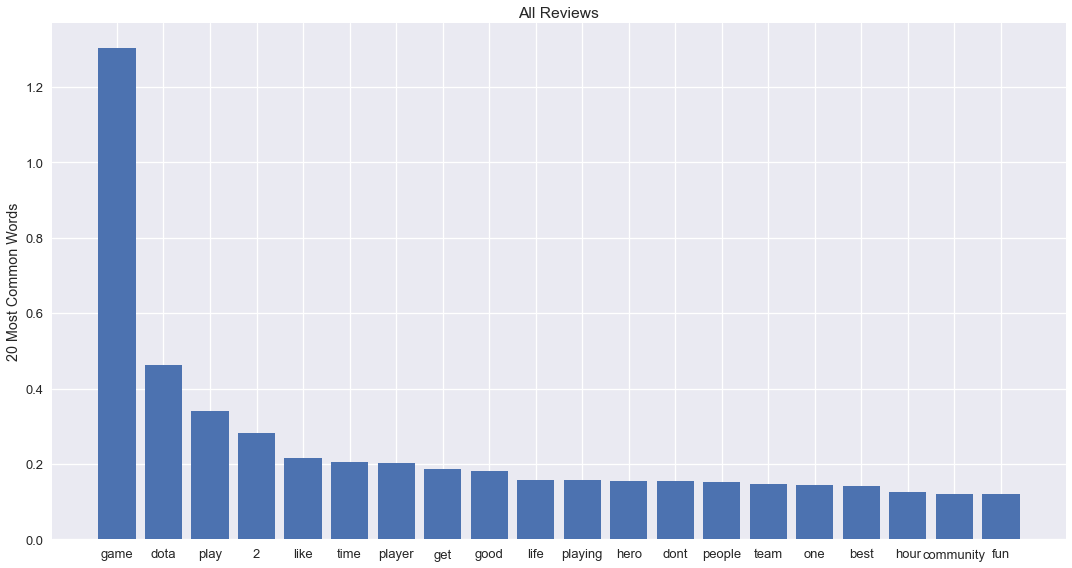

In [57]:
fig = plt.figure(figsize=(15, 8))
plt.bar(words, values_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('All Reviews')

plt.tight_layout()
plt.show()

In [58]:
reviews_pos = reviews_df[reviews_df['voted_up']]['final_reviews']
reviews_neg = reviews_df[~reviews_df['voted_up']]['final_reviews']

In [59]:
vocab_pos = []
for review in reviews_pos.tolist():
    vocab_pos += review.split()

vocab_neg = []
for review in reviews_neg.tolist():
    vocab_neg += review.split()

In [60]:
freqdist_pos = FreqDist(vocab_pos)
top_20_pos = freqdist_pos.most_common(20)

freqdist_neg = FreqDist(vocab_neg)
top_20_neg = freqdist_neg.most_common(20)

In [61]:
words_pos, values_pos = list(zip(*top_20_pos))
values_pos_norm = tuple(v/len(reviews_pos) for v in values_pos)

words_neg, values_neg = list(zip(*top_20_neg))
values_neg_norm = tuple(v/len(reviews_neg) for v in values_neg)

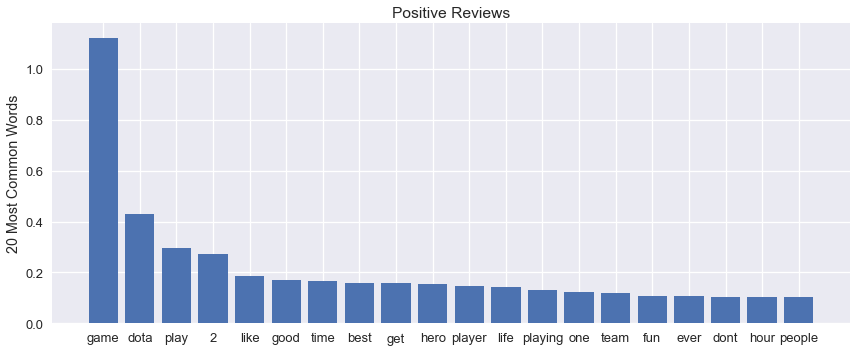

In [62]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_pos, values_pos_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Positive Reviews')

plt.tight_layout()
plt.show()

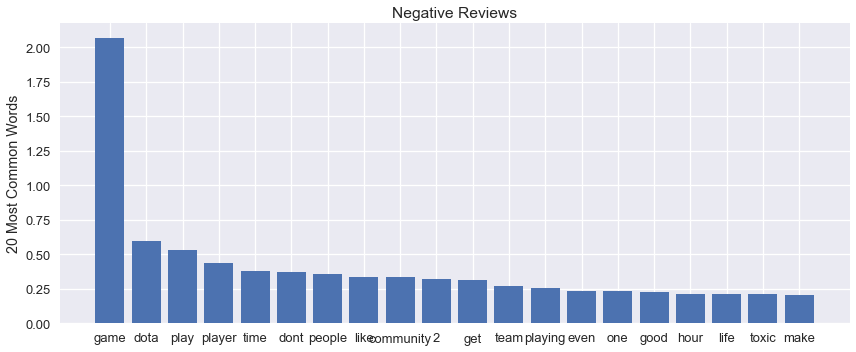

In [63]:
fig = plt.figure(figsize=(12, 5))
plt.bar(words_neg, values_neg_norm, figure=fig)
plt.ylabel('Average Occurances per Review')
plt.ylabel('20 Most Common Words')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()

### Word Clouds

In [64]:
from wordcloud import WordCloud

In [65]:
positive_dict = dict(zip(words_pos, values_pos))
negative_dict = dict(zip(words_neg, values_neg))

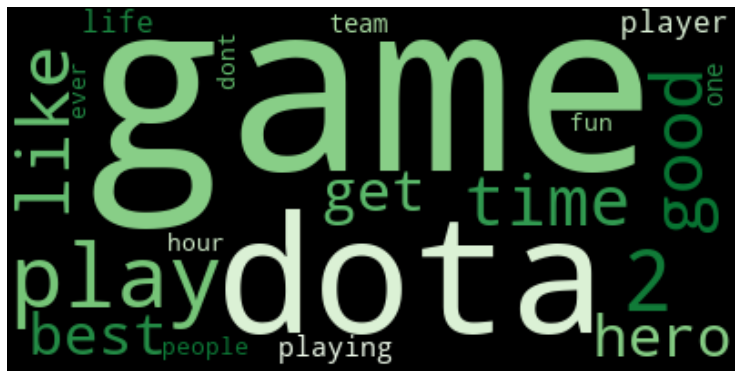

In [66]:
wordcloud = WordCloud(colormap='Greens').generate_from_frequencies(positive_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

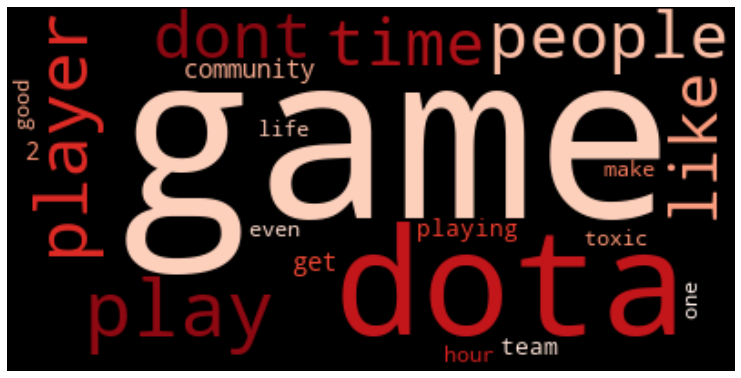

In [67]:
wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(negative_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

## Models

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [69]:
def get_metrics(y_train, y_hat_train, y_test, y_hat_test):
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)
    train_precision = precision_score(y_train, y_hat_train)
    test_precision = precision_score(y_test, y_hat_test)
    train_recall = recall_score(y_train, y_hat_train)
    test_recall = recall_score(y_test, y_hat_test)
    
    print('\t\tAccuracy\tPrecision\tRecall')
    print(f'Training:\t{round(train_accuracy, 2)}\t\t{round(train_precision, 2)}\t\t{round(train_recall, 2)}')
    print(f'Testing:\t{round(test_accuracy, 2)}\t\t{round(test_precision, 2)}\t\t{round(test_recall, 2)}')
    
    return {'train_accuracy':train_accuracy, 'train_precision':train_precision, 'train_recall':train_recall,
            'test_accuracy':test_accuracy, 'test_precision':test_precision, 'test_recall':test_recall}

In [70]:
model_metrics = []

In [71]:
models = [('Logistic Regression', LogisticRegression),
          ('Multinomial Naive Bayes', MultinomialNB),
          ('Random Forest', RandomForestClassifier),
          ('Support Vector Machines', SVC)]
datasets = [('Bag of Words', X_train_bow, X_test_bow),
             ('TF-IDF', X_train_tf, X_test_tf)]

In [72]:
for model_name, model in models:
    for data_name, X_train, X_test in datasets:
        classifier = model()
        classifier.fit(X_train, y_train)
        y_preds_train = classifier.predict(X_train)
        y_preds_test = classifier.predict(X_test)

        print(f'{model_name}\t\t{data_name}')
        metrics = {'model':model_name, 'data':data_name}
        metrics.update(get_metrics(y_train, y_preds_train, y_test, y_preds_test))
        print()
        model_metrics.append(metrics)

Logistic Regression		Bag of Words
		Accuracy	Precision	Recall
Training:	0.93		0.93		1.0
Testing:	0.85		0.87		0.95

Logistic Regression		TF-IDF
		Accuracy	Precision	Recall
Training:	0.87		0.86		0.99
Testing:	0.84		0.85		0.98

Multinomial Naive Bayes		Bag of Words
		Accuracy	Precision	Recall
Training:	0.91		0.91		0.99
Testing:	0.85		0.86		0.97

Multinomial Naive Bayes		TF-IDF
		Accuracy	Precision	Recall
Training:	0.81		0.81		1.0
Testing:	0.81		0.81		1.0

Random Forest		Bag of Words
		Accuracy	Precision	Recall
Training:	0.99		0.99		1.0
Testing:	0.83		0.86		0.95

Random Forest		TF-IDF
		Accuracy	Precision	Recall
Training:	0.99		0.99		1.0
Testing:	0.84		0.84		0.98



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\tahah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-425efc43b03b>", line 4, in <module>
    classifier.fit(X_train, y_train)
  File "C:\Users\tahah\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\tahah\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\tahah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, an

TypeError: object of type 'NoneType' has no len()

In [73]:
model_metrics_df = pd.DataFrame(model_metrics)
model_metrics_df.sort_values(by='test_accuracy', ascending=False)

,model,data,train_accuracy,train_precision,train_recall,test_accuracy,test_precision,test_recall
0,Logistic Regression,Bag of Words,0.933714,0.927422,0.996120,0.850000,0.873676,0.952185
2,Multinomial Naive Bayes,Bag of Words,0.912571,0.909621,0.990476,0.846667,0.855902,0.974444
1,Logistic Regression,TF-IDF,0.867429,0.863539,0.993298,0.844667,0.848506,0.983512
5,Random Forest,TF-IDF,0.988000,0.989485,0.995767,0.836000,0.842665,0.980214
4,Random Forest,Bag of Words,0.988000,0.989828,0.995414,0.832667,0.858420,0.949711
3,Multinomial Naive Bayes,TF-IDF,0.812857,0.812321,1.000000,0.810667,0.810702,0.999176


In [74]:
model_metrics_df.groupby(by='model').mean().sort_values(by='test_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,test_accuracy,test_precision,test_recall
model,,,,,,
Logistic Regression,0.900571,0.895480,0.994709,0.847333,0.861091,0.967848
Random Forest,0.988000,0.989656,0.995591,0.834333,0.850543,0.964963
Multinomial Naive Bayes,0.862714,0.860971,0.995238,0.828667,0.833302,0.986810


In [75]:
model_metrics_df.groupby(by='data').mean().sort_values(by='test_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,test_accuracy,test_precision,test_recall
data,,,,,,
Bag of Words,0.944762,0.942290,0.994004,0.843111,0.862666,0.958780
TF-IDF,0.889429,0.888448,0.996355,0.830444,0.833958,0.987634
